# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
#seu código aqui
# Carrega os dataframes
X_test = pd.read_csv("X_test.csv", delimiter=',')
X_train = pd.read_csv("X_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("y_test.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanced.csv", delimiter=',')

In [3]:
# Confere se os X e y dos treinos e testes possuem os mesmos tamanhos
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(243, 7)
(243, 1)
(41, 7)
(41, 1)


In [4]:
# Confere se o y_train está balanceado
y_train.value_counts()

Credit Score_encoded
0                       81
1                       81
2                       81
Name: count, dtype: int64

In [5]:
X_train.head(5)

,Age,Income,Number of Children,Gender_Male,Home Ownership_Rented,Marital Status_Single,Education_encoded
0,52.0,130000.0,0,1,0,0,0
1,45.0,115000.0,3,0,0,0,2
2,44.0,87500.0,0,1,0,1,3
3,25.0,55000.0,0,0,1,1,2
4,36.0,35000.0,0,0,1,1,0


In [6]:
y_train.head(5)

,Credit Score_encoded
0,2
1,2
2,2
3,1
4,0


In [7]:
X_test.head(5)

,Age,Income,Number of Children,Gender_Male,Home Ownership_Rented,Marital Status_Single,Education_encoded
0,27.0,37500.0,0,0,1,1,0
1,30.0,112500.0,2,1,0,0,3
2,35.0,85000.0,1,0,0,0,4
3,38.0,67500.0,2,0,0,0,2
4,48.0,87500.0,1,0,0,0,4


In [8]:
y_test.head(5)

,Credit Score_encoded
0,0
1,2
2,2
3,2
4,2


Parece que está tudo certo com os treinos e os testes, mesmo tamanho e balanceado

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

O algoritmo de **Árvore de Decisão** segue uma rotina semelhante à de outros modelos de aprendizado de máquina, começando pelo tratamento dos dados. A primeira etapa consiste em limpar a base, tratar valores faltantes e identificar possíveis outliers. Essa fase é de suma importância, pois impacta diretamente o desempenho do modelo.

Após o tratamento, a base é dividida em conjuntos de **treino** e **teste**. É fundamental realizar também o **balanceamento dos dados** de treino, para evitar que o modelo se torne enviesado em favor das classes majoritárias. Em seguida, o modelo é treinado e avaliado por meio de métricas como acurácia, *recall*, F1-score, entre outras.

Na etapa seguinte, o modelo é testado no conjunto de teste, novamente utilizando as mesmas métricas para comparação. Por fim, realiza-se o aprimoramento do modelo, verificando possíveis casos de **overfitting**. No caso específico das Árvores de Decisão, utiliza-se a técnica de **poda**, que consiste em simplificar a árvore, mantendo apenas as **features mais relevantes** para melhorar a capacidade de generalização do modelo.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [9]:
#seu código aqui
# Cria uma instancia da arvore de decisão
arvore_credito = DecisionTreeClassifier (criterion = 'gini', random_state = 0)

# Treina o modelo com os dados de treino balanceados
arvore_credito.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
# Realiza as previsão com os dados de treinamento
previsoes = arvore_credito.predict(X_train)
acuracia = accuracy_score(y_train, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


In [11]:
# Demais métricas
relatorio = classification_report(y_train, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        81

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weighted avg       1.00      1.00      1.00       243



De fato espera-se um valor proximo de 1, no entanto acertar todas as previsões pode ser um indício de *overfitting*. Vamos ver como o modelo prevê os dados de teste para obtermos uma conclusão mais acertiva.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [12]:
#seu código aqui
# Realiza as previsão com os dados de teste
previsoes_teste = arvore_credito.predict(X_test)
acuracia_teste = accuracy_score(y_test, previsoes_teste)
print("Acurácia:", acuracia_teste)

Acurácia: 1.0


In [13]:
# Demais métricas
relatorio_teste = classification_report(y_test, previsoes_teste)
print("Relatório de Classificação:")
print(relatorio_teste)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        32

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



Novamente, foi obtida uma **pontuação perfeita**: o modelo acertou todas as previsões. Portanto, a suspeita de *overfitting* não se confirmou, já que o desempenho nos dados de teste também foi excelente. Isso indica que o modelo conseguiu **generalizar muito bem**.

Como tanto o conjunto de treino quanto o de teste apresentaram resultados perfeitos, concluo que o modelo está adequadamente treinado e se mostra bastante **apropriado para o problema** em questão.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

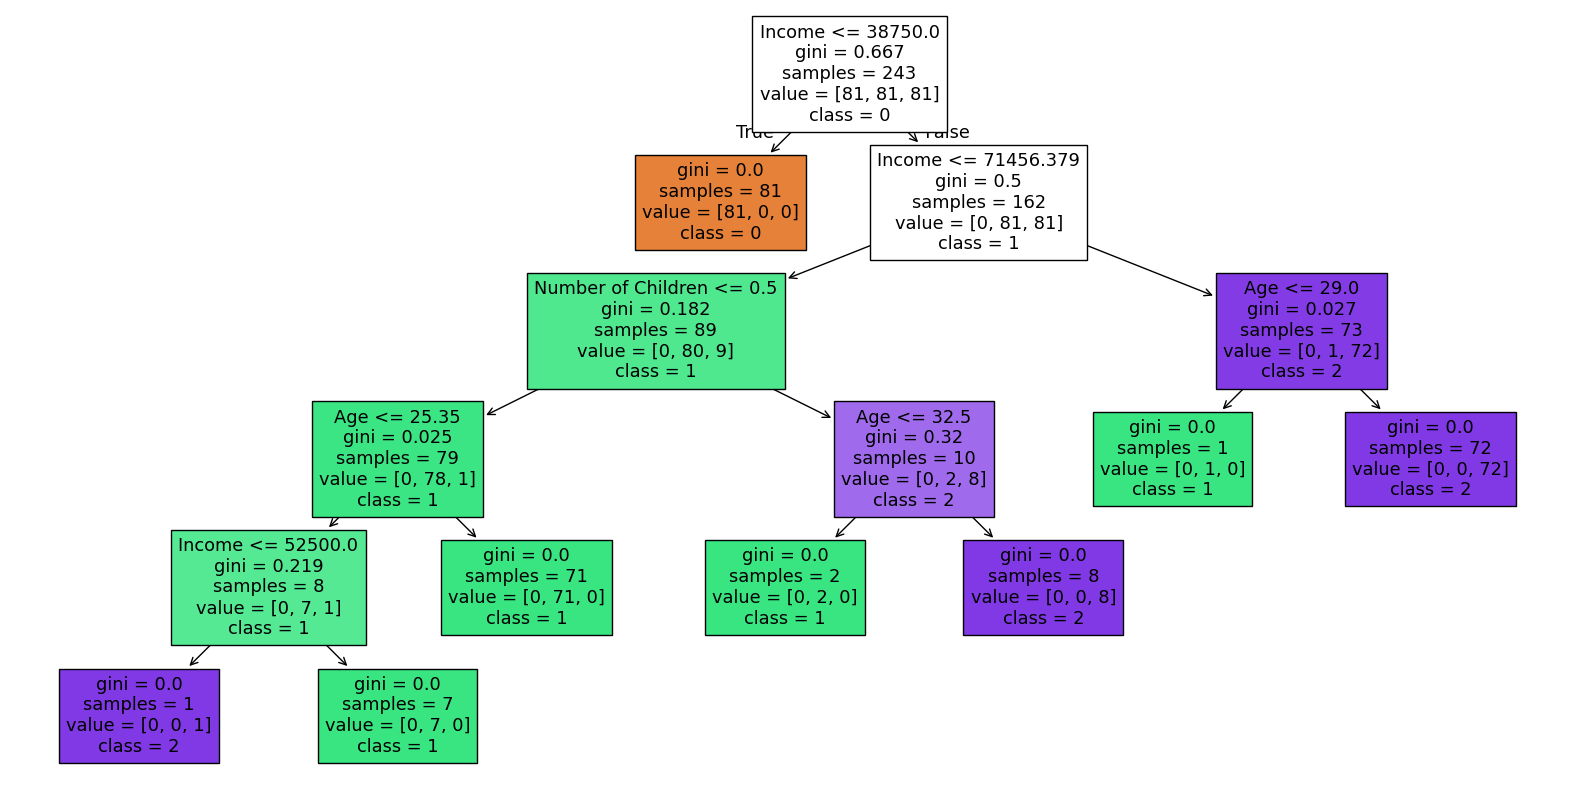

In [14]:
#seu código aqui
# Plot da arvore
plt.figure(figsize=(20,10))
plot_tree(arvore_credito, filled=True, feature_names=X_train.columns, class_names=['0', '1', '2'])
plt.show()

Sim, é possível avaliar visualmente o *plot* da árvore.

A árvore plotada possui uma profundidade **5**.

# 6) Identifique as 2 principais features do modelo.


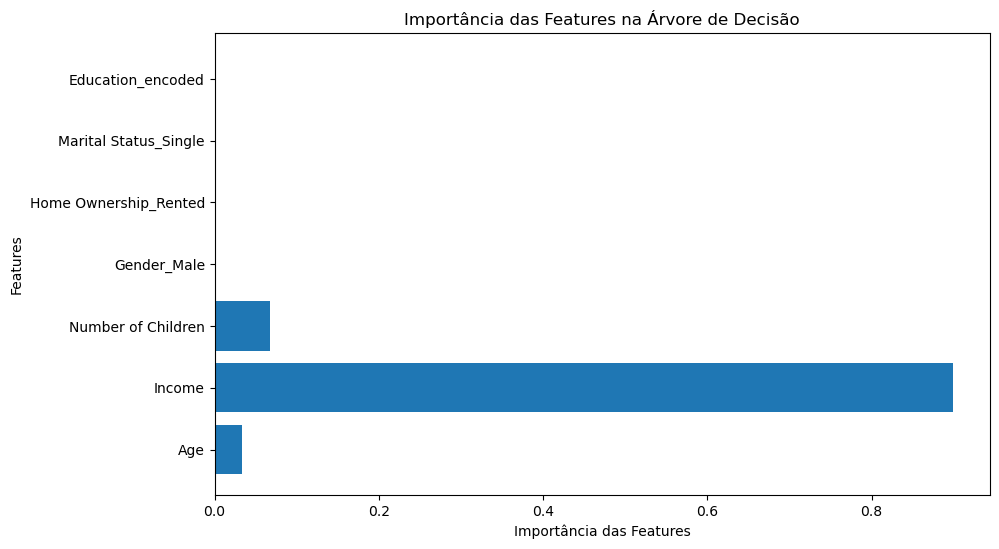

In [15]:
#seu código aqui
# Obtendo as features mais importantes do modelo de árvore de decisão
importancias_features = arvore_credito.feature_importances_

# Obtendo os nomes das features
nomes_features = X_train.columns

# Criando um gráfico de barras para visualizar a importância das features
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

A partir do gráfico constata-se que as 2 *features* mais **importantes** são:
- Income
- Number of Children

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [16]:
#seu código aqui
# Separa os dados de treino apenas com as features mais importantes
X_train_reduzido = X_train[['Income', 'Number of Children']]
X_test_reduzido = X_test[['Income', 'Number of Children']]

# Treina o modelo com os dados acima
arvore_credito_reduzido = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_credito_reduzido.fit(X_train_reduzido, y_train)

# Preve os dados de teste
previsoes_reduzido = arvore_credito_reduzido.predict(X_test_reduzido)

# Avalia o modelo
relatorio_reduzido = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação:")
print(relatorio_reduzido)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.57      1.00      0.73         4
           2       1.00      0.91      0.95        32

    accuracy                           0.93        41
   macro avg       0.86      0.97      0.89        41
weighted avg       0.96      0.93      0.94        41



Não está melhor que o modelo anterior, está **pior**.

O modelo anterior obteve uma pontuação perfeita, quanto que o reduzido errou algumas previsões. É possível ver que a prior métrica foi a precisão para a classe 1, com um valor de 0,57.

Devido ao fato de possuir apenas **3 *features*** importantes, a remoção de uma delas fez com que o modelo piorasse.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Ambos os modelos obtiveram o mesmo resultado, **pontuação perfeita nos dados de teste**.

Portanto é possível concluir que ambos os modelos se adequaram bem aos dados e são apropriados para esta tarefa de classificação.